$$\mbox{CASO AMAZON}$$

## Integrantes del equipo:

    -Hernan Carmelo Cavadias Martinez
    -Duvan Santiago Castro Bolivar 
    -David Santiago Buitrago Norato
    -Miguel Angel Malagón Romero

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import platform
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Importacion de la base de datos
datos = pd.read_excel('DB.xlsx')

In [3]:
datos.head()

,uid,company_v,satis,poverq,soverq,pq,VN_1009_Q20A,VN_1009_TP01,VN_1009_TP02,VN_1009_TP03,...,VN_1009_TP06,VN_1009_TP11,VN_1009_TP12,VN_1009_TP13,VN_1009_TP16,VN_1009_TP17,VN_1009_TP19,VN_1009_TP25A,age,race
0,5,ZALORA,7,9,7,6,8,6,7,6,...,8,7,8,7,9,8,9,2,30,1
1,11,FAVE,7,7,8,8,8,8,7,7,...,9,8,7,7,7,8,6,3,29,1
2,15,FAVE,6,6,7,7,7,8,7,6,...,8,7,7,8,7,7,8,1,42,1
3,19,AMAZON,8,8,8,7,8,9,8,6,...,8,8,8,7,7,7,7,1,30,1
4,20,QOO10,8,7,6,8,7,8,9,8,...,6,8,7,8,7,8,6,3,43,1


Como medida incial, a través de Excel selecionamos las variables que consideramos perminentes y no redundantes para realizar el modelo, las cuales son:

![Nombre Variables](VARIABLE.JPG)


## Data Understanding

Teniendo en cuenta el caso de estudio, queremos conocer que piensan los consumidores sobre las diferentes plataformas de retail, para ser más concretos queremos saber sobre AMAZON, TAOBAO/TMALL y QOO10, dado que son la competencia directa de Amazon. 

Para mirar el nivel de satisfacción utilizaremos la variable **satis** y como filtro lo haremos por **Raza**  _(1 Chinese, 2 Malay, 3 Indian, 4 Eurasian, 5 Others)_ y **Plataforma**

$$\mbox{Histogramas de nivel de satisfacción del cliente para AMAZON, TAOBAO y QOO10 en China}$$

In [4]:
# Filtro por empresa y región China
filtro1 = (datos['company_v'] == 'AMAZON') & (datos['race'] == 1)
datos_filtrados1 = datos[filtro1]

filtro2 = (datos['company_v'] == 'TAOBAO/TMALL') & (datos['race'] == 1)
datos_filtrados2 = datos[filtro2]

filtro3 = (datos['company_v'] == 'QOO10') & (datos['race'] == 1)
datos_filtrados3 = datos[filtro3]

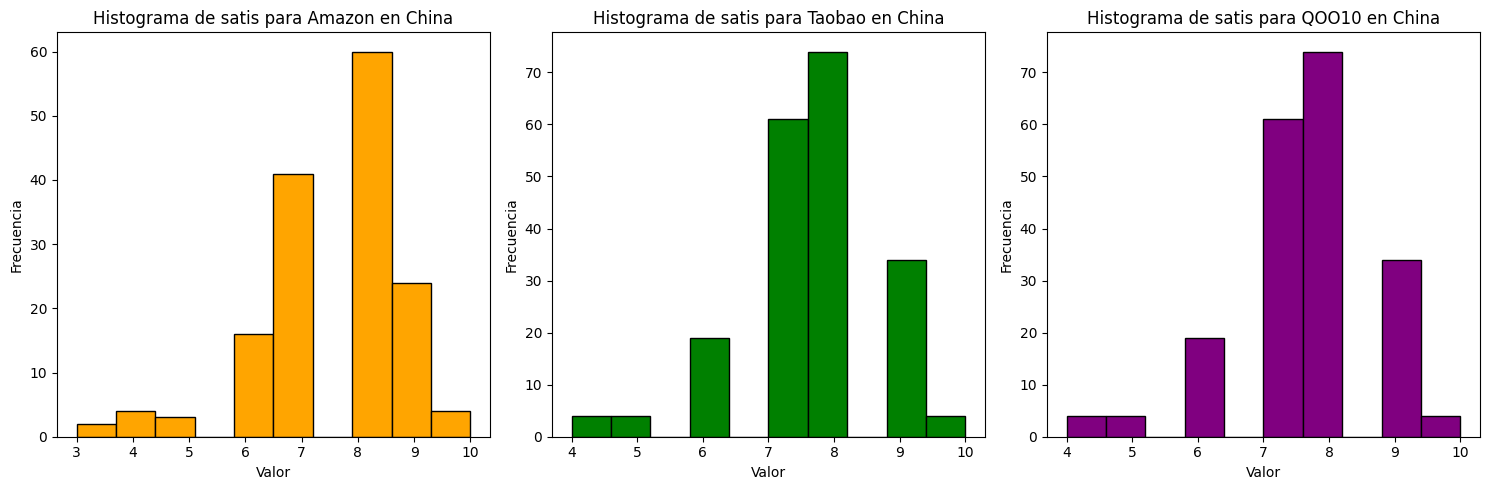

In [5]:
var = "satis"
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Histograma para df1
axs[0].hist(datos_filtrados1[var], bins=10, color='orange', edgecolor='black')
axs[0].set_title(f'Histograma de {var} para Amazon en China')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

# Histograma para df2
axs[1].hist(datos_filtrados2[var], bins=10, color='green', edgecolor='black')
axs[1].set_title(f'Histograma de {var} para Taobao en China')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia')

# Histograma para df3
axs[2].hist(datos_filtrados2[var], bins=10, color='purple', edgecolor='black')
axs[2].set_title(f'Histograma de {var} para QOO10 en China')
axs[2].set_xlabel('Valor')
axs[2].set_ylabel('Frecuencia')

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la figura con los tres histogramas
plt.show()

Como podemos ver el nivel de satisfacción de los clientes en China, es usperior para las liendas Tobao y QOO10, cabe aclarar para el lector que cuando se hizo el filtro la cantidad de observaciones entre dataframes no es el mismo.

$$\mbox{Histogramas de nivel de variedad de productos para AMAZON, TAOBAO y QOO10 en China}$$

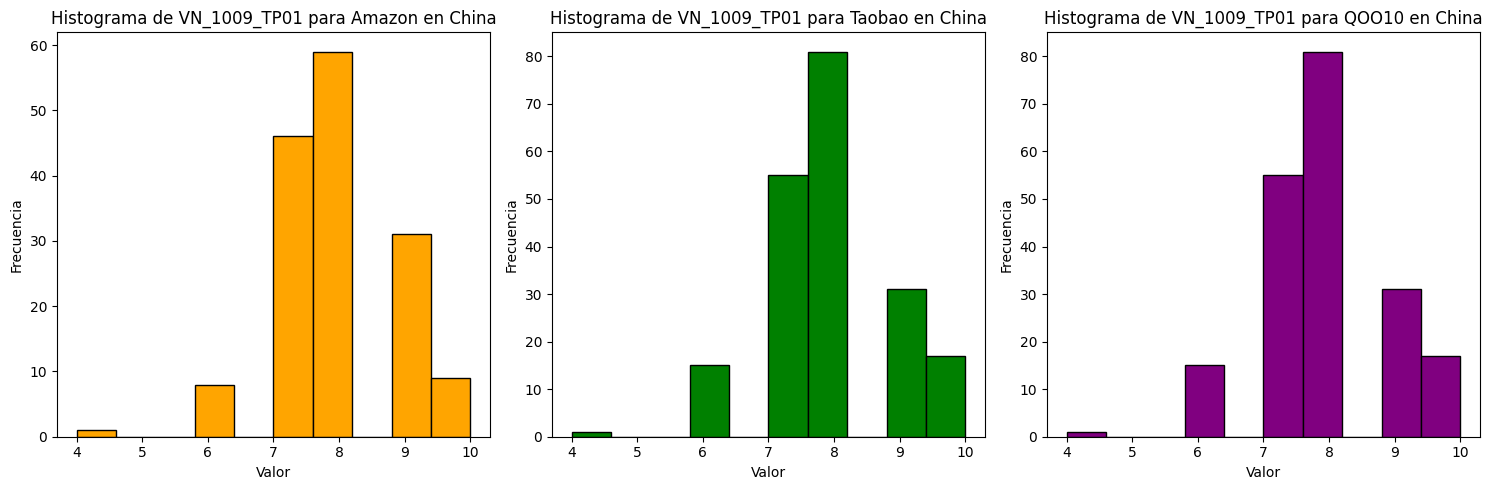

In [6]:
var = "VN_1009_TP01"
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Histograma para df1
axs[0].hist(datos_filtrados1[var], bins=10, color='orange', edgecolor='black')
axs[0].set_title(f'Histograma de {var} para Amazon en China')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

# Histograma para df2
axs[1].hist(datos_filtrados2[var], bins=10, color='green', edgecolor='black')
axs[1].set_title(f'Histograma de {var} para Taobao en China')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia')

# Histograma para df3
axs[2].hist(datos_filtrados2[var], bins=10, color='purple', edgecolor='black')
axs[2].set_title(f'Histograma de {var} para QOO10 en China')
axs[2].set_xlabel('Valor')
axs[2].set_ylabel('Frecuencia')

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la figura con los tres histogramas
plt.show()

$$\mbox{Histogramas de la satifacción por calidad del producto para AMAZON, TAOBAO y QOO10 en China}$$

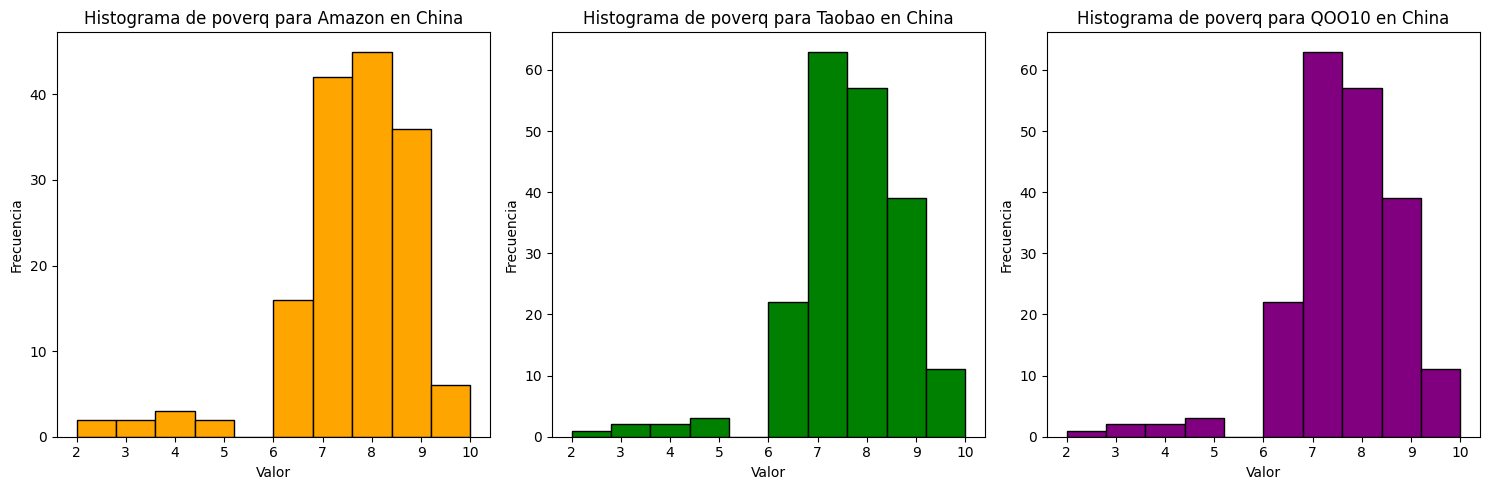

In [7]:
var = "poverq"
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Histograma para df1
axs[0].hist(datos_filtrados1[var], bins=10, color='orange', edgecolor='black')
axs[0].set_title(f'Histograma de {var} para Amazon en China')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

# Histograma para df2
axs[1].hist(datos_filtrados2[var], bins=10, color='green', edgecolor='black')
axs[1].set_title(f'Histograma de {var} para Taobao en China')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia')

# Histograma para df3
axs[2].hist(datos_filtrados2[var], bins=10, color='purple', edgecolor='black')
axs[2].set_title(f'Histograma de {var} para QOO10 en China')
axs[2].set_xlabel('Valor')
axs[2].set_ylabel('Frecuencia')

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la figura con los tres histogramas
plt.show()

Como podemos notar las plataformas Taobao y QOO10 tienen dominancia en satisfacción del cliente en cuanto a calidad y variedad de productos que se pueden encontrar en dichos sitios, notando así que el problema de Amazon en singapur, ubicado en China es un tema más de preferencias de los consumidores.

## Data Preparation

In [8]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,1600.0,2948.575000,1717.270229,5.0,1478.5,2877.0,4395.5,6087.0
satis,1600.0,7.575625,1.192233,2.0,7.0,8.0,8.0,10.0
poverq,1600.0,7.573750,1.362248,2.0,7.0,8.0,8.0,10.0
soverq,1600.0,7.548750,1.314802,2.0,7.0,8.0,8.0,10.0
pq,1600.0,7.573125,1.363200,2.0,7.0,8.0,8.0,10.0
VN_1009_Q20A,1600.0,7.669375,1.243897,2.0,7.0,8.0,8.0,10.0
VN_1009_TP01,1600.0,7.858125,1.046987,3.0,7.0,8.0,9.0,10.0
VN_1009_TP02,1600.0,7.596250,1.267573,2.0,7.0,8.0,9.0,10.0
VN_1009_TP03,1600.0,7.631875,1.199900,2.0,7.0,8.0,8.0,10.0
VN_1009_TP04,1600.0,7.742500,1.179327,2.0,7.0,8.0,9.0,10.0


Como podemos ver la mayoría de las variables son categóricas las cuales se encuentran entre 1 y 10, notamos que en algunas variables tenemos observaciones que registran un 97, direccionándonos al diccionario de la base de datos, notamos que hace parte de las observaciones en donde los encuestados no saben/ no responden. 

Para tratar dichas observaciones vamos a hacer un conteo del total de observaciones que presentan dichas problemáticas, para analizar el eliminarlas o no del modelo. 
 

In [9]:
(datos != 97).all(axis=1).value_counts()

True     1311
False     289
dtype: int64

Como vemos notamos que hay 289 observaciones que presentan estas problematicas, con el fin de no afectar nuestro modelo lo vamos a borrar. 

In [10]:
filtro = (datos[datos.columns[5:]]!=97)
datos2 = datos[filtro]
datos2.update(datos.iloc[:, 0:5])
datos2.dropna(axis=0,inplace=True)
datos2.reset_index(drop=True, inplace=True)
datos2.shape

(1311, 22)

Corregido el error, vamos volver categorica la variable de étinia a través de Dummis.

In [11]:
etnia = {1:"Chinese", 2:"Malay", 3:"Indian", 4:"Eurasian", 5:"Others"}
for valor, nv in etnia.items():
    datos2['race'] = datos2['race'].replace(valor, nv)

In [12]:
df_dummi = pd.get_dummies(datos2['race'],prefix_sep ='_',drop_first=True)
datos2 = pd.concat([datos2, df_dummi], axis=1)
datos2.rename(columns={'race':"Chinese"}, inplace=True)
datos2['Chinese'] = datos2['Chinese'].apply(lambda x: 1 if x == 'Chinese' else 0) # remplaza por 1 y 0
datos2['VN_1009_TP25A'] = datos2['VN_1009_TP25A'].apply(lambda x: 1 if x == 2 else 0) # Tipo de tienda (virtual)
datos2.head(3)

,uid,company_v,satis,poverq,soverq,pq,VN_1009_Q20A,VN_1009_TP01,VN_1009_TP02,VN_1009_TP03,...,VN_1009_TP16,VN_1009_TP17,VN_1009_TP19,VN_1009_TP25A,age,Chinese,Eurasian,Indian,Malay,Others
0,5.0,ZALORA,7.0,9.0,7.0,6,8,6,7,6,...,9.0,8,9.0,1,30,1,0,0,0,0
1,11.0,FAVE,7.0,7.0,8.0,8,8,8,7,7,...,7.0,8,6.0,0,29,1,0,0,0,0
2,15.0,FAVE,6.0,6.0,7.0,7,7,8,7,6,...,7.0,7,8.0,0,42,1,0,0,0,0


## Modelación

Vamos a empezar con un modelo para Amazon

In [13]:
amazon = datos2['company_v']=='AMAZON'
amazon =datos2[amazon]

### Entrenamiento del modelo

In [14]:
x = amazon[amazon.columns[3:]].values
y = amazon['satis'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Crear un modelo de regresión multilineallineal

In [16]:
modelo = linear_model.LinearRegression().fit(X_train, y_train)
y_esti= modelo.predict(X_test)

### Validación del modelo

In [17]:
r2 = r2_score(y_test, y_esti)
print(f"Coeficiente de determinación R2: {r2:.2f}")

Coeficiente de determinación R2: 0.87


### calcular los errores del modelo

In [18]:
print('Error promedio - Regresion Multilineal:', round(mean_absolute_error(y_test, y_esti),3))
print('Error MSE - Regresion Multilineal:', round(mean_squared_error(y_test, y_esti),3))

Error promedio - Regresion Multilineal: 0.387
Error MSE - Regresion Multilineal: 0.251


In [19]:
colum = datos2.columns[3:]
for i in range(0,23):
    print(f'coeficiente:{colum[i]}:',round(modelo.coef_[i],3))

coeficiente:poverq: 0.096
coeficiente:soverq: 0.067
coeficiente:pq: 0.076
coeficiente:VN_1009_Q20A: 0.618
coeficiente:VN_1009_TP01: -0.003
coeficiente:VN_1009_TP02: 0.002
coeficiente:VN_1009_TP03: -0.063
coeficiente:VN_1009_TP04: 0.024
coeficiente:VN_1009_TP05: 0.117
coeficiente:VN_1009_TP06: 0.057
coeficiente:VN_1009_TP11: 0.071
coeficiente:VN_1009_TP12: 0.022
coeficiente:VN_1009_TP13: 0.077
coeficiente:VN_1009_TP16: -0.012
coeficiente:VN_1009_TP17: -0.016
coeficiente:VN_1009_TP19: 0.003
coeficiente:VN_1009_TP25A: 0.069
coeficiente:age: 0.003
coeficiente:Chinese: 0.055
coeficiente:Eurasian: 0.0
coeficiente:Indian: -0.024
coeficiente:Malay: 0.082
coeficiente:Others: -0.113


## Taobao 

In [20]:
taobao = datos2['company_v']=='TAOBAO/TMALL'
taobao =datos2[taobao]
taobao.shape

(164, 26)

In [21]:
x2 = taobao[taobao.columns[3:-4]].values
y2 = taobao['satis'].values

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

### Crear un modelo de regresión multilineallineal

In [23]:
modelo2 = linear_model.LinearRegression().fit(X_train2, y_train2)
y_esti2= modelo2.predict(X_test2)

### Validación del modelo

In [24]:
r22 = r2_score(y_test2, y_esti2)
print(f"Coeficiente de determinación R2 para Taobao es: {r22:.2f}")

Coeficiente de determinación R2 para Taobao es: 0.81


### calcular los errores del modelo

In [25]:
print('Error promedio - Regresion Multilineal:', round(mean_absolute_error(y_test2, y_esti2),3))
print('Error MSE - Regresion Multilineal:', round(mean_squared_error(y_test2, y_esti2),3))

Error promedio - Regresion Multilineal: 0.34
Error MSE - Regresion Multilineal: 0.215


In [26]:
colum = datos2.columns[3:-4]
for i in range(0,19):
    print(f'coeficiente:{colum[i]}:',round(modelo2.coef_[i],3))

coeficiente:poverq: 0.046
coeficiente:soverq: 0.062
coeficiente:pq: 0.123
coeficiente:VN_1009_Q20A: 0.529
coeficiente:VN_1009_TP01: 0.081
coeficiente:VN_1009_TP02: 0.053
coeficiente:VN_1009_TP03: 0.025
coeficiente:VN_1009_TP04: -0.024
coeficiente:VN_1009_TP05: 0.016
coeficiente:VN_1009_TP06: 0.035
coeficiente:VN_1009_TP11: 0.085
coeficiente:VN_1009_TP12: 0.022
coeficiente:VN_1009_TP13: -0.005
coeficiente:VN_1009_TP16: 0.056
coeficiente:VN_1009_TP17: -0.092
coeficiente:VN_1009_TP19: 0.108
coeficiente:VN_1009_TP25A: 0.006
coeficiente:age: -0.0
coeficiente:Chinese: 0.0


$$\mbox{Conclusiones}$$

- Como vimos en el Business Understanding la competencia y la parte cultural juegan un papel muy importante a la hora de impactar en un mercado, en el caso de Amazon, llegar a Singapur ha sido todo un reto, porque en principio el grupo Alibaba tienen una participación en el sector de comercio electrónico muy fuerte, asociado claramente a un tema de gustos culturales, lo que comúnmente se llama fidelidad a la marca y a lo que Amazon no podría llegar a cambiar tan fácil.  


- Por otra parte, los medios de pago, la diversificación en los productos ofrecidos, así como la calidad y precio de estos, puede ser un factor determinante a la hora de elegir en que plataforma comprar, en donde empresas como Taobao y Tmall tienden a ser preferidas sobre Amazon, en gran parte de China.
